In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

Using TensorFlow backend.


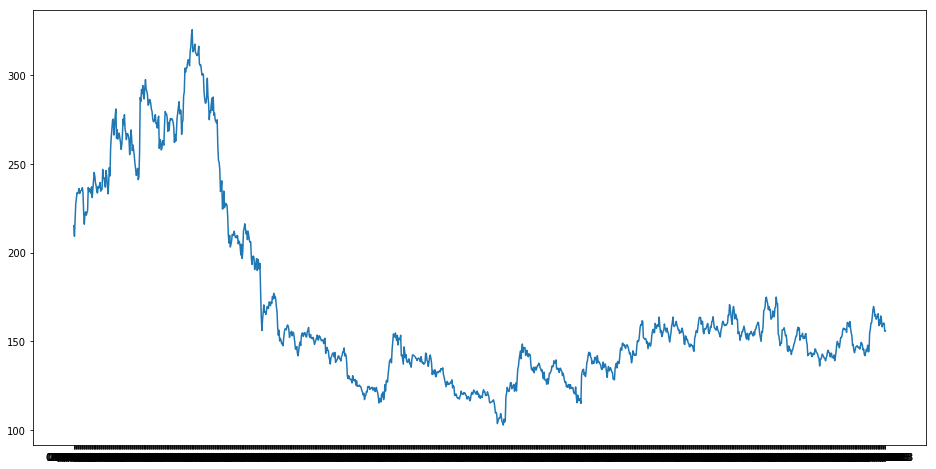

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


df = pd.read_csv(r'C:\Users\ASUS\Downloads\NSE-TATAGLOBAL11.csv', index_col = 'Date')


plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [5]:
data = df.sort_index(ascending = True, axis = 0)
new_data  =pd.DataFrame(index = range(0,len(df)), columns = ['Date', 'Close'])
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
new_data.index = new_data.Date
new_data.drop('Date', axis = 1, inplace = True)

dataset = new_data.values

train = dataset[0:987, :]
valid = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units = 50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))


model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 1,batch_size = 1, verbose = 2)

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 57s - loss: 0.0028


In [6]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

10.626992615908469

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


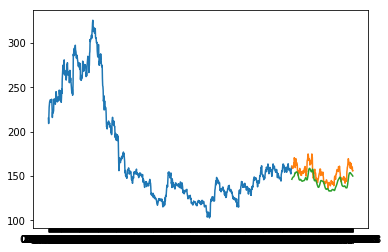

In [7]:

train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [8]:
print(valid)

             Close  Predictions
Date                           
09/10/2014  161.25   146.278030
08/10/2014  160.25   146.928299
07/10/2014   158.8   147.600723
01/10/2014  158.85   148.110886
30/09/2014  159.35   148.480759
29/09/2014     159   148.769730
26/09/2014  159.65   148.955338
25/09/2014   160.3   149.114487
24/09/2014  164.75   149.294037
23/09/2014  164.45   149.818130
22/09/2014   170.6   150.470215
19/09/2014   168.6   151.625992
18/09/2014  164.85   152.808350
17/09/2014   161.6   153.607346
16/09/2014  159.45   153.854309
15/09/2014   167.2   153.586548
12/09/2014  169.55   153.654083
11/09/2014   167.4   154.087662
10/09/2014  162.55   154.531860
09/09/2014   165.2   154.566971
08/09/2014   164.6   154.576782
05/09/2014  162.25   154.517090
04/09/2014   162.2   154.240021
03/09/2014  154.25   153.862610
02/09/2014   155.4   152.836121
01/09/2014   153.9   151.628479
28/08/2014   150.5   150.303726
27/08/2014   153.1   148.771561
26/08/2014  152.95   147.466034
25/08/20

In [10]:
valid['Percentage'] = (valid['Predictions']/valid['Predictions'].shift(1) - 1)*100
valid['Percentage']

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date
09/10/2014         NaN
08/10/2014    0.444543
07/10/2014    0.457656
01/10/2014    0.345635
30/09/2014    0.249732
29/09/2014    0.194621
26/09/2014    0.124764
25/09/2014    0.106847
24/09/2014    0.120413
23/09/2014    0.351048
22/09/2014    0.435245
19/09/2014    0.768113
18/09/2014    0.779784
17/09/2014    0.522876
16/09/2014    0.160778
15/09/2014   -0.174034
12/09/2014    0.043976
11/09/2014    0.282180
10/09/2014    0.288272
09/09/2014    0.022721
08/09/2014    0.006342
05/09/2014   -0.038618
04/09/2014   -0.179315
03/09/2014   -0.244689
02/09/2014   -0.667149
01/09/2014   -0.790155
28/08/2014   -0.873685
27/08/2014   -1.019382
26/08/2014   -0.877535
25/08/2014   -0.724697
                ...   
20/11/2013   -0.391722
19/11/2013   -0.224787
18/11/2013   -0.148743
14/11/2013    0.086176
13/11/2013    0.007451
12/11/2013   -0.019014
11/11/2013    0.534630
08/11/2013    0.917888
07/11/2013    1.253641
06/11/2013    1.340365
05/11/2013    1.435935
03/11/2013    1.568353
01/11/

In [14]:
valid['High'] = df['High']
valid['High']

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date
09/10/2014    163.35
08/10/2014    161.00
07/10/2014    161.65
01/10/2014    162.00
30/09/2014    162.40
29/09/2014    161.90
26/09/2014    161.95
25/09/2014    165.65
24/09/2014    166.75
23/09/2014    171.80
22/09/2014    172.00
19/09/2014    172.90
18/09/2014    165.70
17/09/2014    162.70
16/09/2014    167.60
15/09/2014    170.85
12/09/2014    171.35
11/09/2014    169.85
10/09/2014    165.00
09/09/2014    166.25
08/09/2014    166.50
05/09/2014    164.50
04/09/2014    163.90
03/09/2014    156.80
02/09/2014    156.85
01/09/2014    154.35
28/08/2014    154.00
27/08/2014    154.85
26/08/2014    155.50
25/08/2014    157.80
               ...  
20/11/2013    147.80
19/11/2013    149.20
18/11/2013    148.35
14/11/2013    146.90
13/11/2013    155.00
12/11/2013    159.65
11/11/2013    161.25
08/11/2013    163.00
07/11/2013    167.90
06/11/2013    168.95
05/11/2013    169.80
03/11/2013    170.00
01/11/2013    169.90
31/10/2013    167.10
30/10/2013    166.00
29/10/2013    164.20
28/10/20

In [15]:
valid['Low'] = df['Low']
valid['Low']

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date
09/10/2014    160.45
08/10/2014    157.75
07/10/2014    158.00
01/10/2014    158.40
30/09/2014    157.60
29/09/2014    158.30
26/09/2014    154.45
25/09/2014    159.10
24/09/2014    161.80
23/09/2014    163.65
22/09/2014    167.05
19/09/2014    164.10
18/09/2014    160.05
17/09/2014    156.90
16/09/2014    158.00
15/09/2014    166.35
12/09/2014    166.40
11/09/2014    161.00
10/09/2014    160.50
09/09/2014    162.60
08/09/2014    162.50
05/09/2014    160.05
04/09/2014    154.00
03/09/2014    153.55
02/09/2014    153.00
01/09/2014    151.10
28/08/2014    150.00
27/08/2014    152.50
26/08/2014    151.35
25/08/2014    155.00
               ...  
20/11/2013    144.75
19/11/2013    144.05
18/11/2013    142.50
14/11/2013    142.80
13/11/2013    141.10
12/11/2013    153.10
11/11/2013    155.10
08/11/2013    157.80
07/11/2013    159.05
06/11/2013    163.10
05/11/2013    165.90
03/11/2013    167.25
01/11/2013    161.55
31/10/2013    163.10
30/10/2013    162.65
29/10/2013    160.25
28/10/20

In [16]:
print(valid)

             Close  Predictions  Percentage    High     Low
Date                                                       
09/10/2014  161.25   146.278030         NaN  163.35  160.45
08/10/2014  160.25   146.928299    0.444543  161.00  157.75
07/10/2014   158.8   147.600723    0.457656  161.65  158.00
01/10/2014  158.85   148.110886    0.345635  162.00  158.40
30/09/2014  159.35   148.480759    0.249732  162.40  157.60
29/09/2014     159   148.769730    0.194621  161.90  158.30
26/09/2014  159.65   148.955338    0.124764  161.95  154.45
25/09/2014   160.3   149.114487    0.106847  165.65  159.10
24/09/2014  164.75   149.294037    0.120413  166.75  161.80
23/09/2014  164.45   149.818130    0.351048  171.80  163.65
22/09/2014   170.6   150.470215    0.435245  172.00  167.05
19/09/2014   168.6   151.625992    0.768113  172.90  164.10
18/09/2014  164.85   152.808350    0.779784  165.70  160.05
17/09/2014   161.6   153.607346    0.522876  162.70  156.90
16/09/2014  159.45   153.854309    0.160

In [17]:
valid.to_csv(r'G:\Predictor_LSTM_TATAGLOBALL.csv')